# Домашнее задание 1 (5 баллов).

Все задания ниже имеют равный вес (5/16).

In [2]:
import pandas as pd

#### Описание данных

В папке Data находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶

In [3]:
list = []
df_array = []
df1_array = []
df2_array = []
for i in range(10):
    list.append(['Students_info_' + str(i) + '.csv', 'Students_marks_' + str(i) + '.csv'])
for elem in list:
    df1 = pd.read_csv(elem[0], sep=',')
    df2 = pd.read_csv(elem[1], sep=',')
    df1_array.append(df1)
    df2_array.append(df2)
df1 = pd.concat(df1_array)
df2 = pd.concat(df2_array)
df = pd.merge(df1, df2, how='outer')
df.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [336]:
del df['index']
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67
9,female,group B,high school,free/reduced,none,group1,38,60,50


#### Задание 3. Выведите на экран размеры полученной таблицы

In [315]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,female,group D,some college,standard,completed,group10,68,78,77


#### Можно узнать размеры либо так, посмотрев вниз и увидев 1000 строк на 9 столбцов, или же через size

In [316]:
df.size

9000

#### Или же еще так:

In [317]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [318]:
df['math score'].min()

0

In [319]:
df['math score'].max()

100

In [320]:
df['math score'].mean()

66.089

In [321]:
df['math score'].std()

15.163080096009468

In [322]:
df['reading score'].min()

17

In [323]:
df['reading score'].max()

100

In [324]:
df['reading score'].mean()

69.169

In [325]:
df['reading score'].std()

14.60019193725222

In [326]:
df['writing score'].min()

10

In [327]:
df['writing score'].max()

100

In [328]:
df['writing score'].mean()

68.054

In [329]:
df['writing score'].std()

15.195657010869642

#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [330]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
group                          0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Проверили количество пропущенныз значений по столбцам, везде нули => пропущенных значений нет

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [337]:
df['math score'].mean()

66.089

In [338]:
df['reading score'].mean()

69.169

In [339]:
df['writing score'].mean()

68.054

**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [345]:
df.groupby('test preparation course')['math score'].apply(lambda x: x.mean())

test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

In [346]:
df.groupby('test preparation course')['reading score'].apply(lambda x: x.mean())

test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64

In [347]:
df.groupby('test preparation course')['writing score'].apply(lambda x: x.mean())

test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64

**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [344]:
set(df['lunch'])

{'free/reduced', 'standard'}

**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [368]:
df = df.rename(columns={"parental level of education": "education", "test preparation course": "test preparation"})
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75


**Зафиксируем минимальный балл для сдачи экзамена**

In [473]:
passmark = 50

**Задание 10. Ответьте на вопросы:**
    * Какая доля студентов сдала экзамен по математике (passmark > 50)?
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике? 

#### Отвечаем на 1й вопрос, ответ 0.85

In [355]:
df['math score'].apply(lambda x: x > 50).value_counts() / len(df['math score'])

True     0.85
False    0.15
Name: math score, dtype: float64

#### Сначала определим общее количество людей, проходивших курс подготовки к экзамену, а затем количество людей, проходивших курс и сдавших экзамен и все поделим

In [430]:
len(df.loc[df['test preparation'] == 'completed'])

358

In [436]:
len(df.loc[(df['test preparation'] == "completed") & (df['math score'] > 50)])/len(df.loc[df['test preparation'] == 'completed'])

0.9078212290502793

#### Значит, ответ 0.907821

In [437]:
len(df.loc[(df['gender'] == 'female') & (df['test preparation'] == 'none') & (df['math score'] < 50)]) / len(df.loc[(df['gender'] == 'female') & (df['test preparation'] == 'none')]) 

0.20958083832335328

#### Ответ на 3й вопрос 0.209581

**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [445]:
df.groupby("race/ethnicity")["reading score"].mean()

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [446]:
import time
start_time = time.time()
df.groupby("race/ethnicity")["reading score"].mean()
print(time.time() - start_time)

0.0020008087158203125


In [451]:
df.groupby("education")["writing score"].min()

education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64

In [450]:
start_time = time.time()
df.groupby("education")["writing score"].min()
print(time.time() - start_time)

0.0029866695404052734


**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [457]:
start_time = time.time()
A = []
B = []
C = []
D = []
E = []
for i in range(1000):
    mark = df.loc[i, "reading score"]
    nationality = df.loc[i, "race/ethnicity"]
    if nationality == "group A":
        A.append(mark)
    elif nationality == "group B":
        B.append(mark)
    elif nationality == "group C":
        C.append(mark)
    elif nationality == "group D":
        D.append(mark)
    elif nationality == "group E":
        E.append(mark)
print(sum(A)/len(A), sum(B)/len(B), sum(C)/len(C), sum(D)/len(D), sum(E)/len(E))
print(time.time() - start_time)

64.67415730337079 67.35263157894737 69.10344827586206 70.03053435114504 73.02857142857142
0.02600264549255371


In [464]:
start_time = time.time()
min_assosiate = 101
min_bachelor = 101
min_high_school = 101
min_master = 101
min_college = 101
min_some_high_school = 101
for i in range(1000):
    mark = df.loc[i, "writing score"]
    education = df.loc[i, "education"]
    if education == "associate's degree":
        if mark < min_assosiate:
            min_assosiate = mark
    elif education == "bachelor's degree":
        if mark < min_bachelor:
            min_bachelor = mark
    elif education == "high school":
        if mark < min_high_school:
            min_high_school = mark
    elif education == "master's degree":
        if mark < min_master:
            min_master = mark
    elif education == "some college":
        if mark < min_college:
            min_college = mark
    elif education == "some high school":
        if mark < min_some_high_school:
            min_some_high_school = mark
print(min_assosiate, min_bachelor, min_high_school, min_master, min_college, min_some_high_school)
print(time.time() - start_time)
    
            

35 38 15 46 19 10
0.02700185775756836


#### Сравнивая полученные результаты времени, можно сделать вывод, что через цикл время выполнения намного дольше, а именно примерно в 10 раз (0.002 с и 0.026 с соответственно)

**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

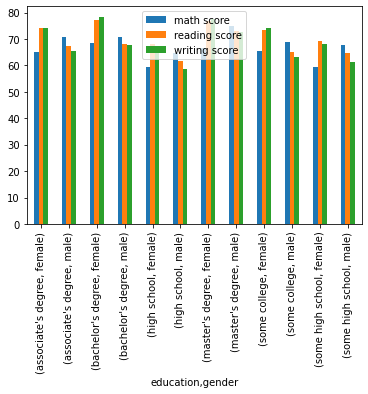

In [468]:
# df.groupby(by=["education", "gender"])["math score"]
import numpy as np
import matplotlib.pyplot as plt
grouped = pd.pivot_table(df, index=['education','gender'],aggfunc={'math score':np.mean, 'reading score':np.mean, 'writing score':np.mean})
grouped.plot(kind='bar')

In [470]:
grouped

math score  reading score  writing score
education          gender                                          
associate's degree female   65.250000      74.120690      74.000000
                   male     70.764151      67.433962      65.405660
bachelor's degree  female   68.349206      77.285714      78.380952
                   male     70.581818      68.090909      67.654545
high school        female   59.351064      68.202128      66.691489
                   male     64.705882      61.480392      58.539216
master's degree    female   66.500000      76.805556      77.638889
                   male     74.826087      73.130435      72.608696
some college       female   65.406780      73.550847      74.050847
                   male     69.009259      64.990741      63.148148
some high school   female   59.296703      69.109890      68.285714
                   male     67.840909      64.693182      61.375000

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [501]:
df["Math_PassStatus"] = ["P" if x >= 50 else "F" for x in df["math score"]]
df["Reading_PassStatus"] = ["P" if x >= 50 else "F" for x in df["reading score"]]
df["Writing_PassStatus"] = ["P" if x >= 50 else "F" for x in df["writing score"]]
df["Math_PassStatus"].value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

In [502]:
df["Reading_PassStatus"].value_counts()

P    910
F     90
Name: Reading_PassStatus, dtype: int64

In [503]:
df["Writing_PassStatus"].value_counts()

P    886
F    114
Name: Writing_PassStatus, dtype: int64

#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [508]:
for i in range(1000):
    if df.loc[i, "Math_PassStatus"] == "F" or df.loc[i, "Reading_PassStatus"] == "F" or df.loc[i, "Writing_PassStatus"] == "F":
        df.loc[i, "OverAll_PassStatus"] = "F"
    else:
        df.loc[i, "OverAll_PassStatus"] = "P"
df["OverAll_PassStatus"].value_counts()

P    812
F    188
Name: OverAll_PassStatus, dtype: int64

#### Количество таких студентов - 812

#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 90 = A
####      80-90 = B
####      70-80 = C
####      60-70 = D
####      50-60 = E
####    меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

In [9]:
def GetGrade(average_mark):
    if average_mark >= 90:
        return "A"
    elif 80 <= average_mark < 90:
        return "B"
    elif 70 <= average_mark < 80:
        return "C"
    elif 60 <= average_mark < 70:
        return "D"
    elif 50 <= average_mark < 60:
        return "E"
    else:
        return "F"
    

#df["Grade"] = [GetGrade(df.loc[i, "math score":"writing score"].mean()) for i in range(1000)]
#df["Grade"].value_counts()
#df['avg_mark'] = df[["math score", "reading score", "writing score"]].apply(lambda x: x.mean())
df['avg_mark'] = (df["math score"] + df["reading score"] +  df["writing score"])/3
df['Grade'] = df['avg_mark'].apply(GetGrade)
df["Grade"].value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Grade, dtype: int64